#### Input

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from helpers import plot_class
from helpers import helpfunction as helper

In [2]:
# Matplotlib help
plt.rcParams.update({"axes.titlesize": "medium"})
plt_h = 4.65

def get_fig(ncols, nleg):
    fig, ax = plt.subplots(
        ncols=ncols,
        nrows=2,
        figsize=(3.5 * ncols + 2 * nleg, plt_h),
        gridspec_kw={"height_ratios": [3, 1]},
        constrained_layout=True,
    )
    return fig, ax

#### Constants

In [3]:
sideband = True
run12 =False
run3 = False
fake = 0

In [4]:
pot_dict = {}
master_query = "(slpdg==12)"
title_str = ''
pi0_scale_bool = True
dirt_bool = True
show_lee_bool = False
maximum_uni_per_type = 5000

if not run12 + run3 + sideband + fake: # Full unblinded data.
    full_sample = True
    print('Unblinded sample')
    beam_on = "on"
    master_query += ("& optical_filter")
    
elif (run12 + run3 + sideband)==1:
    full_sample = False
    title_str = r"Reconstructed $\nu_e$ Energy > 0.9 GeV"
    plt_h = 4.9 # slightly higher plots when title is 2 lines
    beam_on = 'sideband'
    master_query += ("& optical_filter & (reco_e>0.9)")
    if run12:
        # POT needs to be adapted! WIP
        master_query+= ' & (Run<3 | (sample!=2 & sample!=9))'
        
    elif run3:
        # POT needs to be adapted! WIP
        master_query+= ' & (Run==3 | (sample!=2 & sample!=9))'
    else:
        print('Full sideband')
elif fake:
    full_sample = True
    title_str = r"Fake data-set {}".format(fake)
    plt_h = 4.9 # slightly higher plots when title is 2 lines
    beam_on = 'set{}'.format(fake)
    pot_dict = {'EXT': 1, 'E1DCNT_wcut': 0} # set the beam off to 0
    pi0_scale_bool = False
    dirt_bool = False
    show_lee_bool = True
    maximum_uni_per_type = 100
    # No optical filter if fake dataset!
    if fake==5:
        # Manually fix problem with the POT:
        pot_dict['pot'] = 9.00e20
else:
    print('Not possible!')
print(beam_on,pot_dict, master_query)

input_file = "./input/July2020/lite/after_training.pckl"
detvar_file = "./input/July2020/lite/detvar_dict.pckl"
output_dir = "./output/nue/datamc/{}/".format(beam_on)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Full sideband
sideband {} (slpdg==12)& optical_filter & (reco_e>0.9)


In [5]:
plotter = plot_class.Plotter(
    input_file,
    signal="nue",
    genie_version="mcc9.1",
    beam_on=beam_on,
    dirt = dirt_bool,
    pot_dict=pot_dict,
    master_query=master_query,
    load_syst= helper.syst_weights,
    load_detvar=detvar_file,
    show_lee = show_lee_bool,
    pi0_scaling= pi0_scale_bool,
    n_uni_max=maximum_uni_per_type,
    write_slimmed_output = True
)

Applying the master query on the systematic universes
weightsFlux
weightsGenie
weightsReint
Using the spline weights as in MCC9.1 Genie V3 tune 1
Empirical scaling of 1-0.4*E applied on events with neutral pions.
data[beam_on]["pot"] {(9, 0): 6.849e+20}
data[beam_on]["triggers"] {(9, 0): 160471177.0}
data[beam_off]["triggers"] {(2, 1): 65353724.0, (2, 0): 151574089.0, (2, 3): 205406582.0}
All plots are scaled to 6.85e+20 POT, Beam_on data corresponds to 6.85e+20 POT
Loaded all daughter dataframes.
Started loading systematic weights.

Loaded all universes for weightsFlux.
Loaded all universes for weightsGenie.
Loaded all universes for weightsReint.
Dictionary with detector variations loaded into memory.
Do not forget to use self.UpdateDetvarDict(path) after all plotting to update the keys!
Initialisation completed!
writing of slimmed output files finished


In [6]:
print(plotter.keys)

{'shr_tkfit_dedx_y_v', 'knobAxFFCCQEdn', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_x', 'knobVecFFCCQEup', 'npion', 'backtracked_overlay_purity', 'knobAxFFCCQEup', 'nueccinc', 'shr_dist_v', 'weightSplineTimesTune_pi0scaled', 'Run', 'trk_sce_end_y_v', 'pfnhits', 'merge_bestdot', 'CosmicIPAll3D', 'leeweight', 'score_other_min', 'trk_sce_start_z_v', 'slpdg', 'nmuon', 'merge_bestdist', 'score_other_max', 'knobVecFFCCQEdn', 'reco_e', 'nproton', 'event_scale', 'shr_tkfit_4cm_dedx_wm_v', 'trk_llr_pid_score_v', 'backtracked_pz', 'n_tracks_contained', 'shr_tkfit_hitratio_v', 'trk_len_v', 'n_showers_contained', 'knobDecayAngMECdn', 'ismerged', 'evt', 'shr_tkfit_2cm_nhits_Y', 'pfp_shr_daughters_v', 'n_pfps', 'trk_sce_end_x_v', 'trk_score_v', 'trk_sce_start_x_v', 'backtracked_e', 'backtracked_px', 'reco_fid_vol', 'CosmicDirAll3D', 'shr_tkfit_gap10_dedx_y_v', 'hits_per_tklen_v', 'pfp_clusters_v', 'n_pfp_farvtx', 'secondshower_Y_nhit', 'sub', 'shr_phi_v', 'nelec', 'backtracked_pdg', 'true_vtx_distance', 'shr

In [7]:
print(plotter.title_str)

MicroBooNE 6.8e20$\,$POT, Preliminary


### Plots

#### Additions to signal sample plots

In [8]:
# purity/ratio and syst for every step  
if True:
    cats = {2: 11, 1: 10, 3: 1}
    selectors = ["daughter==0", "e_candidate & preselect", "e_candidate & select"]  # q_s
    labs = ["NeutrinoID", "Pre-selection", "Selection"]

    for selector, lab in zip(selectors, labs):
        ratio, purity = plotter.get_ratio_and_purity(selector, return_syst_err=True)
        print("{} \tPurity: {:.2%}+-{:.2%}".format(lab, *purity))
        print("{} \tRatio: {:.2f}+-{:.2f}".format(lab, ratio[0], ratio[2]))

weightsFlux fractional error: 9.03%
weightsGenie fractional error: 15.41%
weightsReint fractional error: 2.06%
knobVecFFCCQE fractional error: 0.03%
knobDecayAngMEC fractional error: 0.05%
knobRPA fractional error: 0.26%
knobThetaDelta2Npi fractional error: 1.45%
knobAxFFCCQE fractional error: 0.01%
Detvar found
Combined detector variation fractional error: 6.28%
MC stat fractional error: 0.78%
NeutrinoID 	Purity: 8.17%+-0.07%
NeutrinoID 	Ratio: 0.94+-0.18
weightsFlux fractional error: 9.31%
weightsGenie fractional error: 16.65%
weightsReint fractional error: 1.96%
knobVecFFCCQE fractional error: 0.02%
knobDecayAngMEC fractional error: 0.01%
knobRPA fractional error: 0.02%
knobThetaDelta2Npi fractional error: 1.55%
knobAxFFCCQE fractional error: 0.01%
Detvar found
Combined detector variation fractional error: 2.47%
MC stat fractional error: 0.91%
Pre-selection 	Purity: 15.15%+-0.16%
Pre-selection 	Ratio: 0.99+-0.20
weightsFlux fractional error: 6.52%
weightsGenie fractional error: 14.6

MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Calculating ratio and purity
weightsFlux fractional error: 9.31%
weightsGenie fractional error: 16.65%
weightsReint fractional error: 1.96%
knobVecFFCCQE fractional error: 0.02%
knobDecayAngMEC fractional error: 0.01%
knobRPA fractional error: 0.02%
knobThetaDelta2Npi fractional error: 1.55%
knobAxFFCCQE fractional error: 0.01%
Detvar not found, key added!
Combined detector variation fractional error: 0.00%
MC stat fractional error: 0.91%
Detvar found


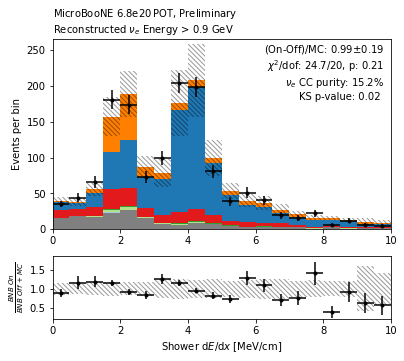

In [9]:
fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax,
    "shr_tkfit_dedx_y_v",
    r"Shower d$E$/d$x$ [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=False,
    query="e_candidate & preselect",
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0], [ratio,purity,ks_p,cnp], text_loc)


#### Data/MC comparison

MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N

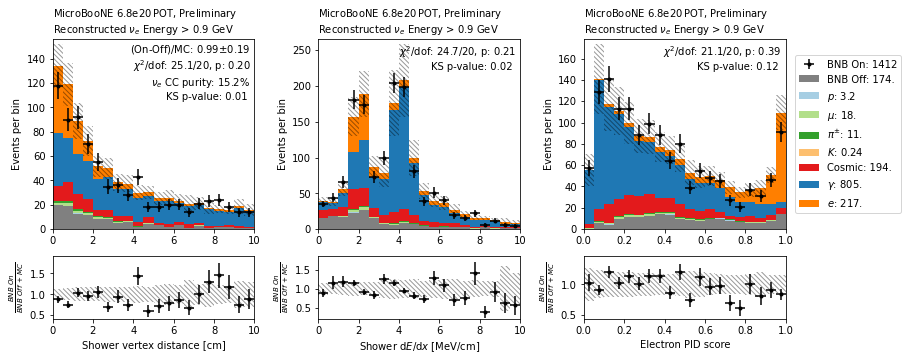

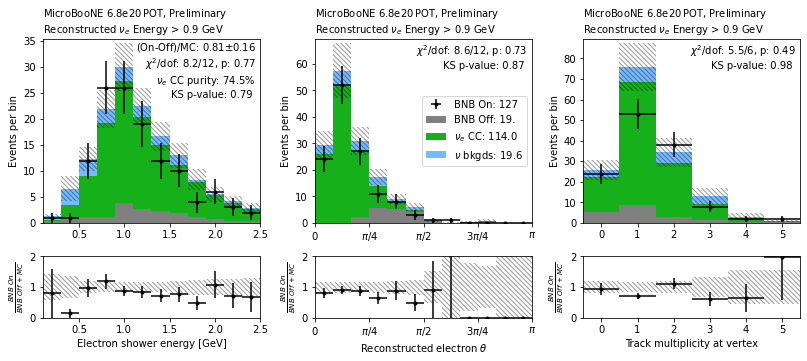

In [11]:
fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_dist_v",
    "Shower vertex distance [cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_tkfit_dedx_y_v",
    r"Shower d$E$/d$x$ [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][1], [None,None,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "score",
    r"Electron PID score",
    N_bins=20,
    x_min=0,
    x_max=1,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][2], [None,None,ks_p,cnp], text_loc)

fig.savefig(output_dir + "fake_before.pdf", bbox_inches="tight")


fig, ax = get_fig(3,0.3)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_energy_y_v/1000",
    "Electron shower energy [GeV]",
    N_bins=12,
    x_min=0.1,
    x_max=2.5,
    query="(select & e_candidate)",
    legend=False,
    title_str=title_str,
    kind="syst",
    show_data=True,
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], 2)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_theta_v",
    r"Reconstructed electron $\theta$",
    N_bins=12,
    x_min=0.0,
    x_max=np.pi,
    query="(select & e_candidate)",
    legend=False,
    title_str=title_str,
    kind="syst",
    show_data=True,
)
plot_class.add_text(ax[0][1], [None,None,ks_p,cnp], text_loc)

ax[1][1].set_xticks(helper.theta_ticks)
ax[1][1].set_xticklabels(helper.theta_labs)
ax[0][1].set_xticks(helper.theta_ticks)
ax[0][1].set_xticklabels(helper.theta_labs)
ax[0][1].legend(loc="center right")

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "trk_at_vtx",
    r"Track multiplicity at vertex",
    N_bins=6,
    x_min=-0.5,
    x_max=5.5,
    query="(select & e_candidate)",
    legend=False,
    title_str=title_str,
    kind="syst",
    show_data=True,
)
plot_class.add_text(ax[0][2], [None,None,ks_p,cnp], 2)

_ = [x.set_ylim(0.0, 2) for x in ax[1]]

fig.savefig(output_dir + "fake_after.pdf", bbox_inches="tight")

In [11]:
if full_sample:
    query = (
        "(reco_fid_vol & contained_fraction>0.4 & daughter==0)"
    )
    fig, ax = get_fig(3,1)

    ax[0][0].axvspan(0, 0.15, facecolor="red", alpha=0.1)
    ax[1][0].axvspan(0, 0.15, facecolor="red", alpha=0.1)
    ax[0][1].axvspan(0, 30, facecolor="red", alpha=0.1)
    ax[1][1].axvspan(0, 30, facecolor="red", alpha=0.1)
    ax[0][2].axvspan(-1, -.98, facecolor="red", alpha=0.1)
    ax[1][2].axvspan(-1, -.98, facecolor="red", alpha=0.1)
    ax[0][2].axvspan(.98, 1, facecolor="red", alpha=0.1)
    ax[1][2].axvspan(.98, 1, facecolor="red", alpha=0.1)

    ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
        ax.T[0],
        "topological_score",
        r"Event topological score",
        N_bins=20,
        x_min=0,
        x_max=1,
        query=query,
        legend=False,
        title_str=title_str,
        kind="cat",
    )
    plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)

    ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
        ax.T[1],
        "CosmicIPAll3D",
        r"Cosmic impact parameter (CosmicIPAll3D) [cm]",
        N_bins=20,
        x_min=0,
        x_max=200,
        query=query,
        title_str=title_str,
        legend=False,
        kind="cat",
    )
    plot_class.add_text(ax[0][1], [ratio,purity,ks_p,cnp], text_loc)

    ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
        ax.T[2],
        "CosmicDirAll3D",
        r"Cosmic impact direction (CosmicDirAll3D) [cm]",
        N_bins=20,
        x_min=-1,
        x_max=1,
        title_str=title_str,
        query=query,
        legend=True,
        kind="cat",
    )
    plot_class.add_text(ax[0][2], [ratio,purity,ks_p,cnp], text_loc)

    fig.savefig(output_dir + "presel_1.pdf", bbox_inches="tight")

In [12]:
# Preselection queries
if full_sample:
    query = "reco_fid_vol & \
             shr_energy_y_v>0 & \
             shr_tkfit_dedx_nhits_y_v>0 & \
             topological_score > 0.15 & \
             pfp_generation_v==2 & \
             trk_llr_pid_score_v>0.4"


    # the cosmic IP variables demand somehow that there is a shower in the event, therefore, they are left out of this cut.
    fig, ax = get_fig(3,1)

    ax[0][0].axvspan(0.3, 1, facecolor="red", alpha=0.1)
    ax[1][0].axvspan(0.3, 1, facecolor="red", alpha=0.1)
    ax[0][1].axvspan(0.5, 2.5, facecolor="red", alpha=0.1)
    ax[1][1].axvspan(0.5, 2.5, facecolor="red", alpha=0.1)
    ax[0][2].axvspan(0, 100, facecolor="red", alpha=0.1)
    ax[1][2].axvspan(0, 100, facecolor="red", alpha=0.1)

    ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
        ax.T[0],
        "trk_score_v",
        r"Track score",
        N_bins=20,
        x_min=0,
        x_max=0.5,
        query=query,
        legend=False,
        show_syst=False,
        title_str=title_str,
        kind="pdg",
        y_label="Showers per bin",
    )
    plot_class.add_text(ax[0][0], [None,purity,ks_p,cnp], text_loc, y=1/3)
    
    ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
        ax.T[1],
        "pfp_clusters_v",
        r"Number of planes",
        N_bins=3,
        x_min=0.5,
        x_max=3.5,
        query=query,
        legend=False,
        show_syst=False,
        title_str=title_str,
        kind="pdg",
        y_label="Showers per bin",
    )
    plot_class.add_text(ax[0][1], [None,purity,ks_p,cnp], text_loc)

    query += " & e_candidate & \
                 contained_fraction>0.4 & \
                 CosmicIPAll3D>30 & \
                 CosmicDirAll3D>-0.98 & \
                 CosmicDirAll3D<0.98"

    ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
        ax.T[2],
        "shr_energy_y_v",
        r"Reconstructed shower energy [GeV]",
        N_bins=20,
        x_min=0,
        x_max=2000,
        query=query,
        legend=True,
        title_str=title_str,
        kind="pdg",
        y_label="Showers per bin",
    )
    plot_class.add_text(ax[0][2], [ratio,purity,ks_p,cnp], text_loc, y=1/3)

    ax[0][0].set_ylim(ax[0][0].get_ylim()[1]/5e1, ax[0][0].get_ylim()[1]*1.25)
    ax[0][0].set_yscale("log")
    ax[0][2].set_ylim(max(ax[0][2].get_ylim()[1]/1e3,1), ax[0][2].get_ylim()[1]*1.25)
    ax[0][2].set_yscale("log")

    fig.savefig(output_dir + "presel_2.pdf", bbox_inches="tight")

MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Calculating ratio and purity
weightsFlux fractional error: 9.31%
weightsGenie fractional error: 16.65%
weightsReint fractional error: 1.96%
knobAxFFCCQE fractional error: 0.01%
knobDecayAngMEC fractional error: 0.01%
knobVecFFCCQE fractional error: 0.02%
knobRPA fractional error: 0.02%
knobThetaDelta2Npi fractional error: 1.55%
MC stat fractional error: 0.91%
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found


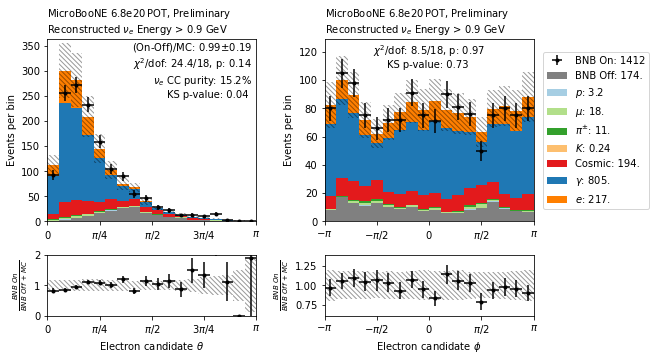

In [13]:
query = "(preselect & e_candidate)"

fig, ax = get_fig(2,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_theta_v",
    r"Electron candidate $\theta$",
    N_bins=18,
    x_min=0,
    x_max=np.pi,
    query=query,
    legend=False,
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)

ax[1][0].set_xticks(helper.theta_ticks)
ax[1][0].set_xticklabels(helper.theta_labs)
ax[0][0].set_xticks(helper.theta_ticks)
ax[0][0].set_xticklabels(helper.theta_labs)


ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_phi_v",
    r"Electron candidate $\phi$",
    N_bins=18,
    x_min=-np.pi,
    x_max=np.pi,
    query=query,
    legend=True,
    title_str=title_str,
    kind="pdg",
    y_max_scaler = 1.1
)
plot_class.add_text(ax[0][1], [None,None,ks_p,cnp], text_loc)

ax[1][1].set_xticks(helper.phi_ticks)
ax[1][1].set_xticklabels(helper.phi_labs)
ax[0][1].set_xticks(helper.phi_ticks)
ax[0][1].set_xticklabels(helper.phi_labs)

fig.savefig(output_dir + "e_cand_theta_phi.pdf", bbox_inches="tight")

## Shower fields
1. feature shr_dist_v (0.406786)
2. feature shr_moliere_avg_v (0.115516)
3. feature shr_tkfit_dedx_y_v (0.103206)
4. feature shr_tkfit_2cm_dedx_Y (0.088309)
5. feature shr_tkfit_4cm_dedx_wm_v (0.080856)
6. feature shr_tkfit_gap10_dedx_y_v (0.078377)
7. feature shr_subclusters_v (0.048331)
8. feature secondshower_Y_nhit (0.046542)
9. feature shr_tkfit_hitratio_v (0.032077)

MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found


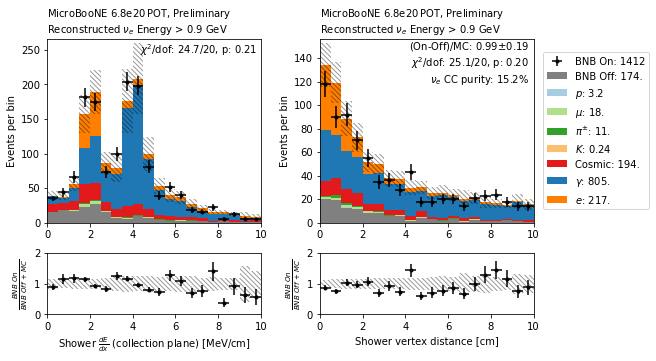

In [14]:
# Neutrino 2020
fig, ax = get_fig(2,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_tkfit_dedx_y_v",
    r"Shower $\frac{dE}{dx}$ (collection plane) [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=False,
    title_str=title_str,
    query="e_candidate>0 & preselect",
    kind="pdg",
)
plot_class.add_text(ax[0][0], [None,None,None,cnp], text_loc)


ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_dist_v",
    "Shower vertex distance [cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=True,
    title_str=title_str,
    query="e_candidate>0 & preselect",
    
    kind="pdg",
)
plot_class.add_text(ax[0][1], [ratio,purity,None,cnp], text_loc)

[x.set_ylim(0.0, 2) for x in ax[1]]

fig.savefig(output_dir + "e_cand_1.pdf", bbox_inches="tight")

MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found


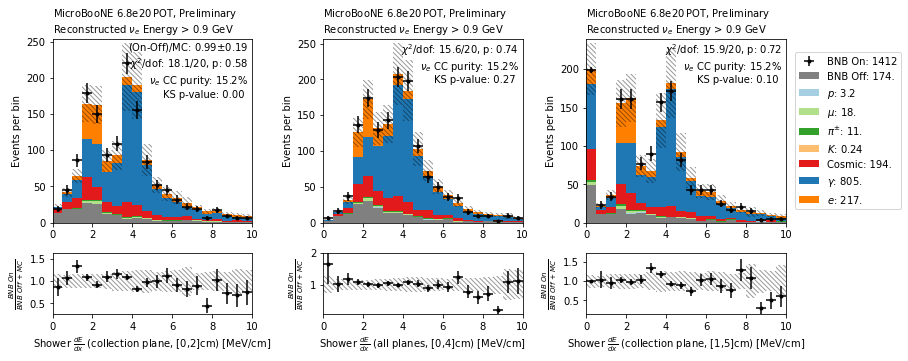

In [15]:
fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_tkfit_2cm_dedx_Y",
    r"Shower $\frac{dE}{dx}$ (collection plane, [0,2]cm) [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_tkfit_4cm_dedx_wm_v",
    r"Shower $\frac{dE}{dx}$ (all planes, [0,4]cm) [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][1], [None,purity,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "shr_tkfit_gap10_dedx_y_v",
    r"Shower $\frac{dE}{dx}$ (collection plane, [1,5]cm) [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=True,
    title_str=title_str,
    query="e_candidate>0 & preselect",  
    kind="pdg",
)
plot_class.add_text(ax[0][2], [None,purity,ks_p,cnp], text_loc)

fig.savefig(output_dir + "e_cand_dedx.pdf", bbox_inches="tight")

MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found


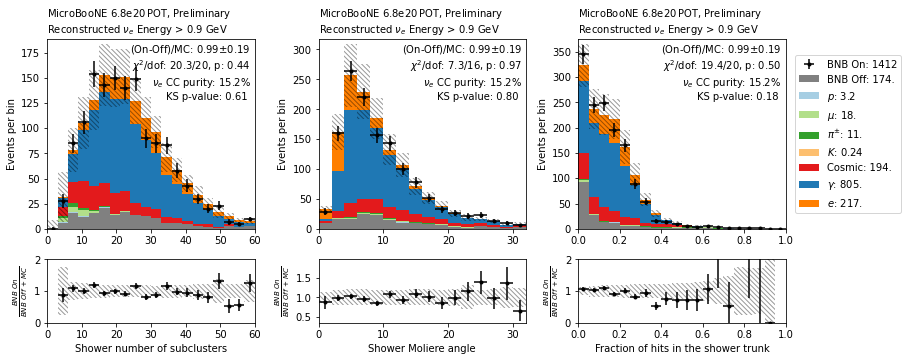

In [16]:
fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_subclusters_v",
    r"Shower number of subclusters",
    N_bins=20,
    x_min=0,
    x_max=60,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_moliere_avg_v",
    r"Shower Moliere angle",
    N_bins=16,
    x_min=0,
    x_max=32,
    legend=False,
    title_str=title_str,
    query="e_candidate>0 & preselect",
    kind="pdg",
)
plot_class.add_text(ax[0][1], [ratio,purity,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "shr_tkfit_hitratio_v",
    r"Fraction of hits in the shower trunk",
    N_bins=20,
    x_min=0,
    x_max=1,
    title_str=title_str,
    legend=True,
    query="e_candidate>0 & preselect",
    kind="pdg",
)
plot_class.add_text(ax[0][2], [ratio,purity,ks_p,cnp], text_loc)

fig.savefig(output_dir + "e_cand_2.pdf", bbox_inches="tight")

MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found


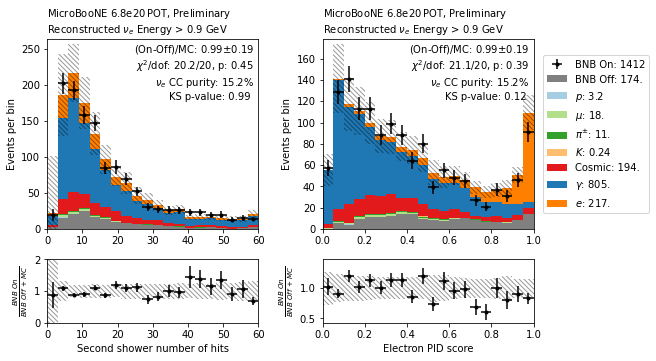

In [17]:
fig, ax = get_fig(2,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "secondshower_Y_nhit",
    "Second shower number of hits",
    N_bins=20,
    x_min=0,
    x_max=60,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "score",
    r"Electron PID score",
    N_bins=20,
    x_min=0,
    x_max=1,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][1], [ratio,purity,ks_p,cnp], text_loc)

fig.savefig(output_dir + "e_cand_3.pdf", bbox_inches="tight")

## Other daughter fields
1. feature trk_llr_pid_score_v (0.382910)
2. feature trk_distance_v (0.201966)
3. feature e_candidate_anglediff (0.081999)
4. feature trk_proton_hypothesis_ratio_v (0.071988)
5. feature trk_score_v (0.068836)
6. feature trk_muon_hypothesis_ratio_v (0.067883)
7. feature pfp_shr_daughters_v (0.050025)
8. feature pfp_generation_v (0.037862)
9. feature pfp_trk_daughters_v (0.036532)

MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC category: Cosmic: 1174. 	#entries 37833
MC category: $\gamma$: 1053. 	#entries 23654
MC category: $e$: 148. 	#entries 24382
Calculating ratio and purity
Systematics only supported for one row per event
MC stat fractional error: 0.49%
Detvar found
Covariance matrices supported for one daughter per event, max found: 15.0


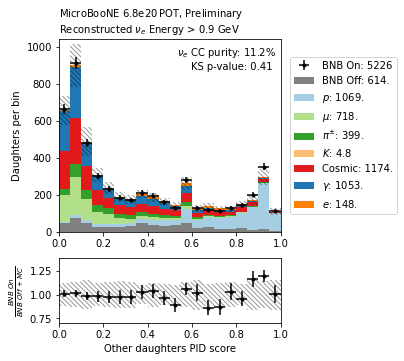

In [18]:
fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T,
    "score",
    "Other daughters PID score",
    N_bins=20,
    x_min=0,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str,
    kind="pdg",
    y_label="Daughters per bin",
)
plot_class.add_text(ax[0], [None,purity,ks_p,None], text_loc)

fig.savefig(output_dir + "daughters_bdt.pdf", bbox_inches="tight")

MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC category: Cosmic: 1174. 	#entries 37833
MC category: $\gamma$: 1053. 	#entries 23654
MC category: $e$: 148. 	#entries 24382
Obtained ratio and purity from dict
Detvar found
Covariance matrices supported for one daughter per event, max found: 15.0
MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC category: Cosmic: 1174. 	#entries 37833
MC category: $\gamma$: 1053. 	#entries 23654
MC category: $e$: 148. 	#entries 24382
Obtained ratio and purity from dict
Detvar found
Covariance matrices supported for one daughter per event, max found: 15.0
MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC categ

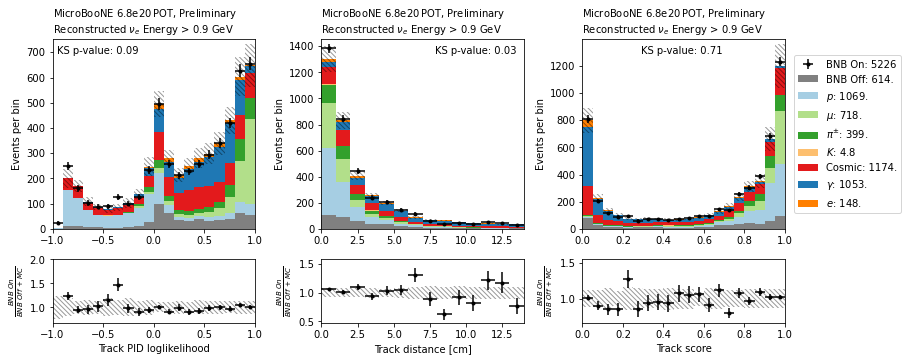

In [19]:
fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID loglikelihood",
    N_bins=20,
    x_min=-1,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=False,
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][0], [None,None,ks_p,None], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "trk_distance_v",
    "Track distance [cm]",
    N_bins=14,
    x_min=0,
    x_max=14,
    query="~e_candidate>0 & preselect",
    legend=False,
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][1], [None,None,ks_p,None], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "trk_score_v",
    "Track score",
    N_bins=20,
    x_min=0,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][2], [None,None,ks_p,None], text_loc)

fig.savefig(output_dir + "pre_daughter_1.pdf", bbox_inches="tight")

MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC category: Cosmic: 1174. 	#entries 37833
MC category: $\gamma$: 1053. 	#entries 23654
MC category: $e$: 148. 	#entries 24382
Obtained ratio and purity from dict
Detvar found
Covariance matrices supported for one daughter per event, max found: 15.0
MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC category: Cosmic: 1174. 	#entries 37833
MC category: $\gamma$: 1053. 	#entries 23654
MC category: $e$: 148. 	#entries 24382
Obtained ratio and purity from dict
Detvar found
Covariance matrices supported for one daughter per event, max found: 15.0
MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC categ

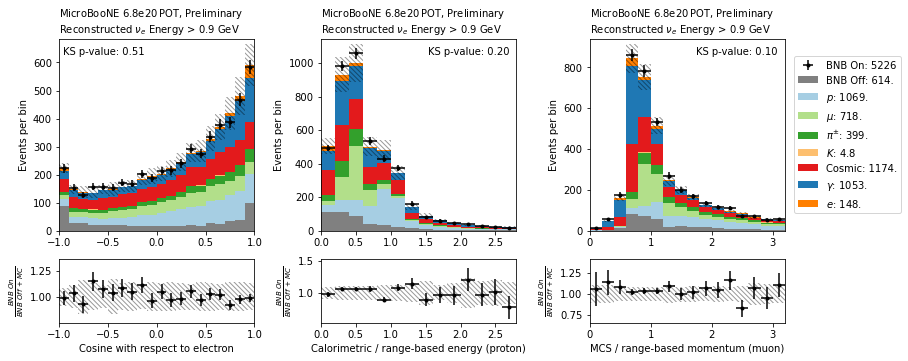

In [20]:
fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "e_candidate_anglediff ",
    "Cosine with respect to electron",
    N_bins=20,
    x_min=-1,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=False,
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][0], [None,None,ks_p,None], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "trk_proton_hypothesis_ratio_v",
    "Calorimetric / range-based energy (proton)",
    N_bins=14,
    x_min=0,
    x_max=2.8,
    query="~e_candidate>0 & preselect",
    legend=False,
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][1], [None,None,ks_p,None], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "trk_muon_hypothesis_ratio_v",
    "MCS / range-based momentum (muon)",
    N_bins=16,
    x_min=0,
    x_max=3.2,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str,
    kind="pdg",
)
plot_class.add_text(ax[0][2], [None,None,ks_p,None], text_loc)

fig.savefig(output_dir + "pre_daughter_2.pdf", bbox_inches="tight")

MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC category: Cosmic: 1174. 	#entries 37833
MC category: $\gamma$: 1053. 	#entries 23654
MC category: $e$: 148. 	#entries 24382
Obtained ratio and purity from dict
Detvar found
Covariance matrices supported for one daughter per event, max found: 15.0
MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC category: Cosmic: 1174. 	#entries 37833
MC category: $\gamma$: 1053. 	#entries 23654
MC category: $e$: 148. 	#entries 24382
Obtained ratio and purity from dict
Detvar found
Covariance matrices supported for one daughter per event, max found: 15.0
MC category: $p$: 1069. 	#entries 50228
MC category: $\mu$: 718. 	#entries 10353
MC category: $\pi^{\pm}$: 399. 	#entries 16687
MC category: $K$: 4.8 	#entries 196
MC categ

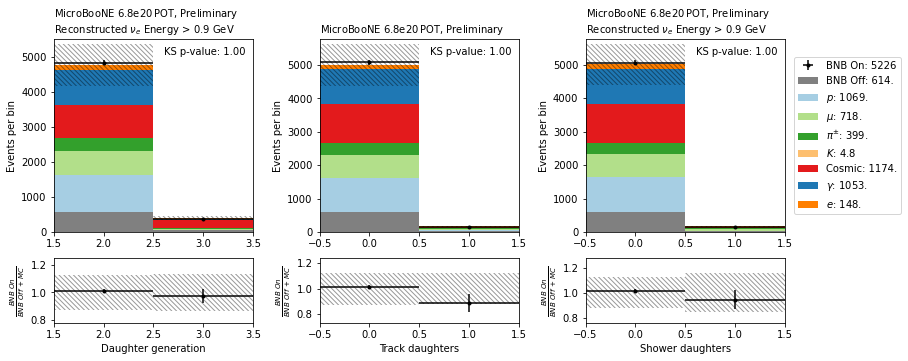

In [21]:
fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "pfp_generation_v",
    "Daughter generation",
    N_bins=2,
    x_min=1.5,
    x_max=3.5,
    query="~e_candidate>0 & preselect",
    title_str=title_str,
    legend=False,
    kind="pdg",
)
plot_class.add_text(ax[0][0], [None,None,ks_p,None], 2)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "pfp_trk_daughters_v",
    "Track daughters",
    N_bins=2,
    x_min=-0.5,
    x_max=1.5,
    query="~e_candidate>0 & preselect",
    legend=False,
    kind="pdg",
)
plot_class.add_text(ax[0][1], [None,None,ks_p,None], 2)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "pfp_shr_daughters_v",
    "Shower daughters",
    N_bins=2,
    x_min=-0.5,
    x_max=1.5,
    query="~e_candidate>0 & preselect",
    title_str=title_str,
    legend=True,
    kind="pdg",
)
plot_class.add_text(ax[0][2], [None,None,ks_p,None], 2)

fig.savefig(output_dir + "pre_daughter_3.pdf", bbox_inches="tight")

## Combined BDT
1. feature score (0.623621)
2. feature score_other_mean (0.188310)
3. feature n_showers (0.061185)
4. feature score_other_min (0.043890)
5. feature score_other_max (0.040488)
6. feature n_pfp_farvtx (0.023708)
7. feature contained_fraction (0.018798)

MC category: $\nu_e$ CC N$\pi$: 84. 	#entries 17113
MC category: $\nu_e$ CC 0$\pi$0p: 20. 	#entries 3342
MC category: $\nu_e$ CC 0$\pi$Np: 111. 	#entries 18341
MC category: $\nu_{\mu}$ CC other: 105. 	#entries 1305
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 499. 	#entries 7680
MC category: $\nu$ NC: 27. 	#entries 768
MC category: $\nu$ NC $\pi^{0}$: 169. 	#entries 1398
MC category: Cosmic: 196. 	#entries 2830
MC category: Out of FV: 38. 	#entries 379
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$\pi$: 84. 	#entries 17113
MC category: $\nu_e$ CC 0$\pi$0p: 20. 	#entries 3342
MC category: $\nu_e$ CC 0$\pi$Np: 111. 	#entries 18341
MC category: $\nu_{\mu}$ CC other: 105. 	#entries 1305
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 499. 	#entries 7680
MC category: $\nu$ NC: 27. 	#entries 768
MC category: $\nu$ NC $\pi^{0}$: 169. 	#entries 1398
MC category: Cosmic: 196. 	#entries 2830
MC category: Out of FV: 38. 	#entries 379
Obtained ratio and purity from dict
Detvar found


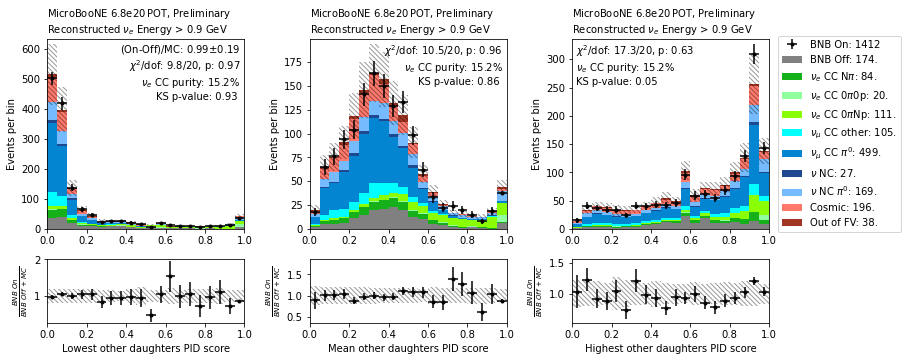

In [22]:
fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "score_other_min",
    "Lowest other daughters PID score",
    N_bins=20,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=False,
    title_str=title_str,
    kind="cat",
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)


ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "score_other_mean",
    "Mean other daughters PID score",
    N_bins=20,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=False,
    title_str=title_str,
    kind="cat",
)
plot_class.add_text(ax[0][1], [None,purity,ks_p,cnp], text_loc)


ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "score_other_max",
    "Highest other daughters PID score",
    N_bins=20,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str,
    kind="cat",
)
plot_class.add_text(ax[0][2], [None,purity,ks_p,cnp], text_loc)

fig.savefig(output_dir + "event_bdt_input_1.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC N$\pi$: 84. 	#entries 17113
MC category: $\nu_e$ CC 0$\pi$0p: 20. 	#entries 3342
MC category: $\nu_e$ CC 0$\pi$Np: 111. 	#entries 18341
MC category: $\nu_{\mu}$ CC other: 105. 	#entries 1305
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 499. 	#entries 7680
MC category: $\nu$ NC: 27. 	#entries 768
MC category: $\nu$ NC $\pi^{0}$: 169. 	#entries 1398
MC category: Cosmic: 196. 	#entries 2830
MC category: Out of FV: 38. 	#entries 379
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$\pi$: 84. 	#entries 17113
MC category: $\nu_e$ CC 0$\pi$0p: 20. 	#entries 3342
MC category: $\nu_e$ CC 0$\pi$Np: 111. 	#entries 18341
MC category: $\nu_{\mu}$ CC other: 105. 	#entries 1305
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 499. 	#entries 7680
MC category: $\nu$ NC: 27. 	#entries 768
MC category: $\nu$ NC $\pi^{0}$: 169. 	#entries 1398
MC category: Cosmic: 196. 	#entries 2830
MC category: Out of FV: 38. 	#entries 379
Obtained ratio and purity from dict
Detvar found


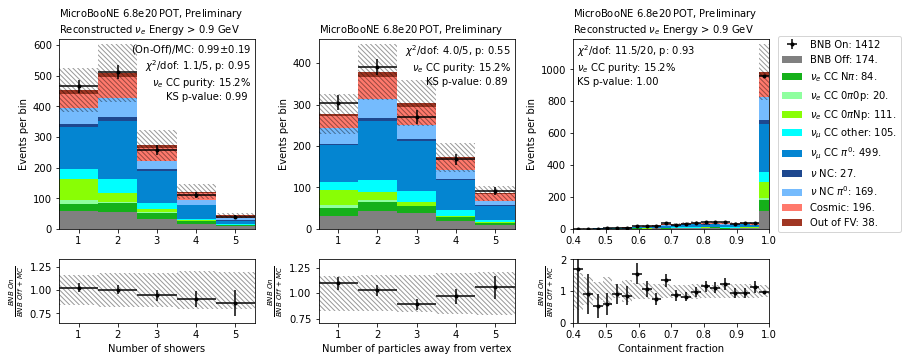

In [23]:
fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "n_showers",
    r"Number of showers",
    N_bins=5,
    x_min=0.5,
    x_max=5.5,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="cat",
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "n_pfp_farvtx",
    r"Number of particles away from vertex",
    N_bins=5,
    x_min=0.5,
    x_max=5.5,
    legend=False,
    query="e_candidate>0 & preselect",
    kind="cat",
)
plot_class.add_text(ax[0][1], [None,purity,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "contained_fraction",
    r"Containment fraction",
    N_bins=20,
    x_min=0.4,
    x_max=1,
    legend=True,
    title_str=title_str,
    query="e_candidate>0 & preselect",
    kind="cat",
)
plot_class.add_text(ax[0][2], [None,purity,ks_p,cnp], text_loc)

fig.savefig(output_dir + "event_bdt_input_2.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC N$\pi$: 84. 	#entries 17113
MC category: $\nu_e$ CC 0$\pi$0p: 20. 	#entries 3342
MC category: $\nu_e$ CC 0$\pi$Np: 111. 	#entries 18341
MC category: $\nu_{\mu}$ CC other: 105. 	#entries 1305
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 499. 	#entries 7680
MC category: $\nu$ NC: 27. 	#entries 768
MC category: $\nu$ NC $\pi^{0}$: 169. 	#entries 1398
MC category: Cosmic: 196. 	#entries 2830
MC category: Out of FV: 38. 	#entries 379
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$\pi$: 31. 	#entries 6080
MC category: $\nu_e$ CC 0$\pi$0p: 12. 	#entries 1939
MC category: $\nu_e$ CC 0$\pi$Np: 72. 	#entries 11807
MC category: $\nu_{\mu}$ CC other: 2.4 	#entries 30
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 6.3 	#entries 102
MC category: $\nu$ NC: 0.54 	#entries 20
MC category: $\nu$ NC $\pi^{0}$: 3.9 	#entries 38
MC category: Cosmic: 3.9 	#entries 112
MC category: Out of FV: 2.6 	#entries 77
Obtained ratio and purity from dict
Detvar found


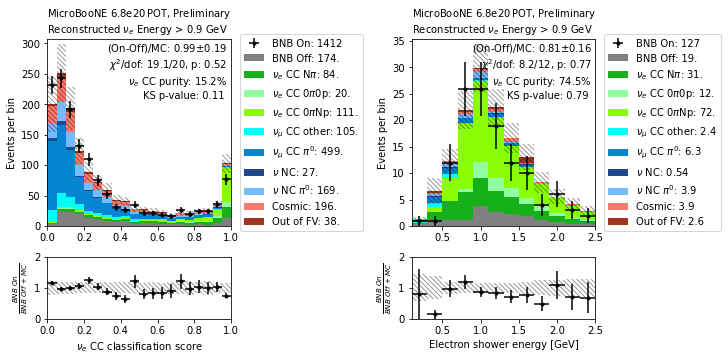

In [24]:
fig, ax = get_fig(2,1.5)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "score_event",
    r"$\nu_e$ CC classification score",
    N_bins=20,
    x_min=0,
    x_max=1,
    query="(preselect & e_candidate)",
    legend=True,
    title_str=title_str,
    kind="cat",
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)


ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_energy_y_v/1000",
    "Electron shower energy [GeV]",
    N_bins=12,
    x_min=0.1,
    x_max=2.5,
    query="(select & e_candidate)",
    legend=True,
    title_str=title_str,
    kind="cat",
)
plot_class.add_text(ax[0][1], [ratio,purity,ks_p,cnp], text_loc)

[x.set_ylim(0.0, 2) for x in ax[1]]

fig.savefig(output_dir + "event_bdt.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC N$\pi$: 84. 	#entries 17113
MC category: $\nu_e$ CC 0$\pi$0p: 20. 	#entries 3342
MC category: $\nu_e$ CC 0$\pi$Np: 111. 	#entries 18341
MC category: $\nu_{\mu}$ CC other: 105. 	#entries 1305
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 499. 	#entries 7680
MC category: $\nu$ NC: 27. 	#entries 768
MC category: $\nu$ NC $\pi^{0}$: 169. 	#entries 1398
MC category: Cosmic: 196. 	#entries 2830
MC category: Out of FV: 38. 	#entries 379
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$\pi$: 31. 	#entries 6080
MC category: $\nu_e$ CC 0$\pi$0p: 12. 	#entries 1939
MC category: $\nu_e$ CC 0$\pi$Np: 72. 	#entries 11807
MC category: $\nu_{\mu}$ CC other: 2.4 	#entries 30
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 6.3 	#entries 102
MC category: $\nu$ NC: 0.54 	#entries 20
MC category: $\nu$ NC $\pi^{0}$: 3.9 	#entries 38
MC category: Cosmic: 3.9 	#entries 112
MC category: Out of FV: 2.6 	#entries 77
Calculating ratio and purity
weightsFlux fractional error: 6.5

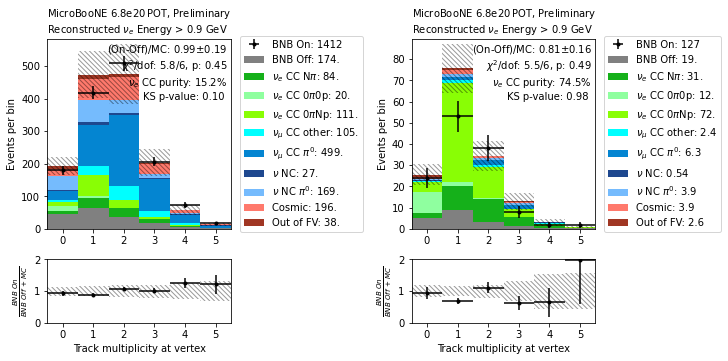

In [25]:
fig, ax = get_fig(2,1.5)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_at_vtx",
    r"Track multiplicity at vertex",
    N_bins=6,
    x_min=-0.5,
    x_max=5.5,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="cat"
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "trk_at_vtx",
    r"Track multiplicity at vertex",
    N_bins=6,
    x_min=-0.5,
    x_max=5.5,
    legend=True,
    query="e_candidate>0 & select",
    title_str=title_str,
    kind="cat"  
)
plot_class.add_text(ax[0][1], [ratio,purity,ks_p,cnp], text_loc)

[x.set_ylim(0.0, 2) for x in ax[1]]

fig.savefig(output_dir + "event_trk_at_vtx.pdf", bbox_inches="tight")

after_e = [
    0.0724407,
    0.069931,
    0.070793,
    0.0591427,
    0.0580825,
    0.0707208,
    0.0619271,
    0.0631596,
    0.071956,
    0.0823832,
    0.076636,
    0.0799156,
    0.0945661,
    0.107033,
    0.127387,
    0.148529,
    0.0948171,
]

after_phi = [
    0.0629107,
    0.0574177,
    0.0622805,
    0.0734858,
    0.0484628,
    0.0669408,
    0.0615361,
    0.062214,
    0.098453,
    0.0704486,
    0.0610666,
    0.063518,
]
after_theta = [
    0.0631627,
    0.0555099,
    0.0535565,
    0.0719665,
    0.0884092,
    0.071224,
    0.0889857,
    0.110553,
    0.114683,
    0.0920515,
    0.132373,
    0.349061,
]

before_e = [
    0.29716,
    0.265507,
    0.24898,
    0.260043,
    0.269309,
    0.240034,
    0.263073,
    0.279628,
    0.281871,
    0.269588,
    0.269238,
    0.280828,
    0.295573,
    0.296626,
    0.265467,
    0.293,
    0.288306,
]

before_phi = [
    0.220577,
    0.266154,
    0.241005,
    0.365799,
    0.414711,
    0.245414,
    0.222696,
    0.248814,
    0.252192,
    0.220549,
    0.263487,
    0.255388,
]

before_theta = [
    0.220855,
    0.255422,
    0.287287,
    0.245846,
    0.289416,
    0.314501,
    0.323908,
    0.286917,
    0.231717,
    0.255552,
    0.282183,
    0.406976,
]

MC category: $\nu_e$ CC N$\pi$: 31. 	#entries 6080
MC category: $\nu_e$ CC 0$\pi$0p: 12. 	#entries 1939
MC category: $\nu_e$ CC 0$\pi$Np: 72. 	#entries 11807
MC category: $\nu_{\mu}$ CC other: 2.4 	#entries 30
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 6.3 	#entries 102
MC category: $\nu$ NC: 0.54 	#entries 20
MC category: $\nu$ NC $\pi^{0}$: 3.9 	#entries 38
MC category: Cosmic: 3.9 	#entries 112
MC category: Out of FV: 2.6 	#entries 77
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$\pi$: 31. 	#entries 6080
MC category: $\nu_e$ CC 0$\pi$0p: 12. 	#entries 1939
MC category: $\nu_e$ CC 0$\pi$Np: 72. 	#entries 11807
MC category: $\nu_{\mu}$ CC other: 2.4 	#entries 30
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 6.3 	#entries 102
MC category: $\nu$ NC: 0.54 	#entries 20
MC category: $\nu$ NC $\pi^{0}$: 3.9 	#entries 38
MC category: Cosmic: 3.9 	#entries 112
MC category: Out of FV: 2.6 	#entries 77
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$

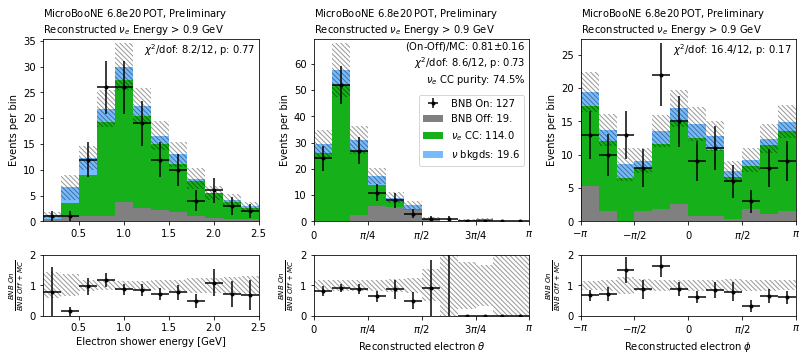

In [26]:
fig, ax = get_fig(3,0.3)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_energy_y_v/1000",
    "Electron shower energy [GeV]",
    N_bins=12,
    x_min=0.1,
    x_max=2.5,
    query="(select & e_candidate)",
    legend=False,
    title_str=title_str,
    kind="syst",
    show_data=True,
)
plot_class.add_text(ax[0][0], [None,None,None,cnp], 2)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_theta_v",
    r"Reconstructed electron $\theta$",
    N_bins=12,
    x_min=0.0,
    x_max=np.pi,
    query="(select & e_candidate)",
    legend=False,
    title_str=title_str,
    kind="syst",
    show_data=True,
)
plot_class.add_text(ax[0][1], [ratio,purity,None,cnp], text_loc)

ax[1][1].set_xticks(helper.theta_ticks)
ax[1][1].set_xticklabels(helper.theta_labs)
ax[0][1].set_xticks(helper.theta_ticks)
ax[0][1].set_xticklabels(helper.theta_labs)
ax[0][1].legend(loc="center right")

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "trk_phi_v",
    "Reconstructed electron $\phi$",
    N_bins=12,
    x_min=-np.pi,
    x_max=np.pi,
    query="(select & e_candidate)",
    legend=False,
    title_str=title_str,
    kind="syst",
    # syst_fractions=before_phi,
    show_data=True,
)
plot_class.add_text(ax[0][2], [None,None,None,cnp], 2)
ax[1][2].set_xticks(helper.phi_ticks)
ax[1][2].set_xticklabels(helper.phi_labs)
ax[0][2].set_xticks(helper.phi_ticks)
ax[0][2].set_xticklabels(helper.phi_labs)

_ = [x.set_ylim(0.0, 2) for x in ax[1]]

fig.savefig(output_dir + "event_e_kinematics.pdf", bbox_inches="tight")

### Validation Plots

MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found
MC category: $p$: 3.2 	#entries 53
MC category: $\mu$: 18. 	#entries 225
MC category: $\pi^{\pm}$: 11. 	#entries 223
MC category: $K$: 0.24 	#entries 4
MC category: Cosmic: 194. 	#entries 2790
MC category: $\gamma$: 805. 	#entries 12324
MC category: $e$: 217. 	#entries 37537
Obtained ratio and purity from dict
Detvar found


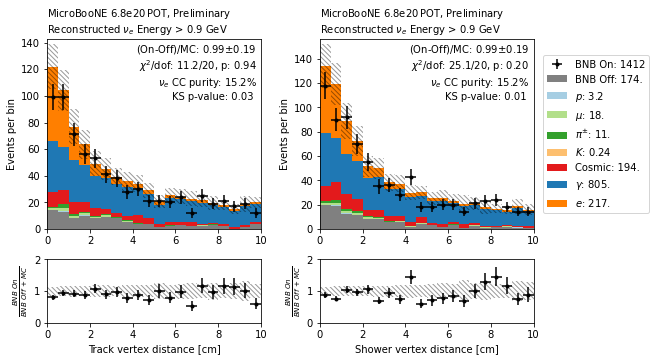

In [27]:
# Shower vs track distance
fig, ax = get_fig(2,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_distance_v",
    "Track vertex distance [cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=False,
    title_str=title_str,
    query="e_candidate>0 & preselect",
    kind="pdg",
)
plot_class.add_text(ax[0][0], [ratio,purity,ks_p,cnp], text_loc)


ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_dist_v",
    "Shower vertex distance [cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=True,
    title_str=title_str,
    query="e_candidate>0 & preselect",
    kind="pdg",
)
plot_class.add_text(ax[0][1], [ratio,purity,ks_p,cnp], text_loc)

[x.set_ylim(0.0, 2) for x in ax[1]]

fig.savefig(output_dir + "val_cand_distance.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC N$\pi$: 84. 	#entries 17113
MC category: $\nu_e$ CC 0$\pi$0p: 20. 	#entries 3342
MC category: $\nu_e$ CC 0$\pi$Np: 111. 	#entries 18341
MC category: $\nu_{\mu}$ CC other: 105. 	#entries 1305
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 499. 	#entries 7680
MC category: $\nu$ NC: 27. 	#entries 768
MC category: $\nu$ NC $\pi^{0}$: 169. 	#entries 1398
MC category: Cosmic: 196. 	#entries 2830
MC category: Out of FV: 38. 	#entries 379
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$\pi$: 84. 	#entries 17113
MC category: $\nu_e$ CC 0$\pi$0p: 20. 	#entries 3342
MC category: $\nu_e$ CC 0$\pi$Np: 111. 	#entries 18341
MC category: $\nu_{\mu}$ CC other: 105. 	#entries 1305
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 499. 	#entries 7680
MC category: $\nu$ NC: 27. 	#entries 768
MC category: $\nu$ NC $\pi^{0}$: 169. 	#entries 1398
MC category: Cosmic: 196. 	#entries 2830
MC category: Out of FV: 38. 	#entries 379
Obtained ratio and purity from dict
Detvar found


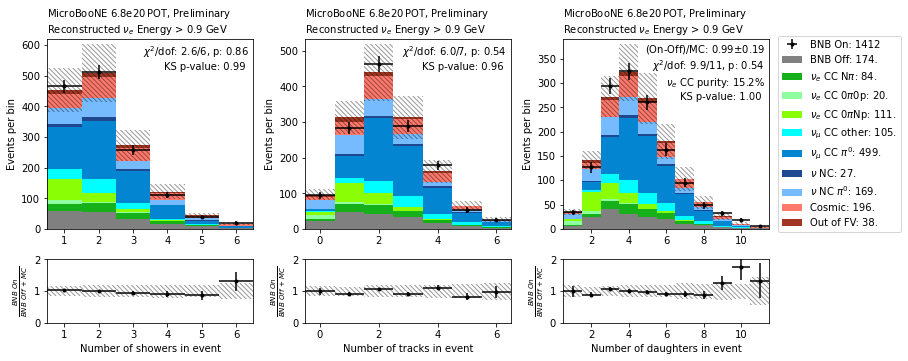

In [28]:
# number of objects after preselection

fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "n_showers",
    r"Number of showers in event",
    N_bins=6,
    x_min=0.5,
    x_max=6.5,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="cat"
)
plot_class.add_text(ax[0][0], [None,None,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "n_tracks",
    r"Number of tracks in event",
    N_bins=7,
    x_min=-0.5,
    x_max=6.5,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="cat"  
)
plot_class.add_text(ax[0][1], [None,None,ks_p,cnp], text_loc)


ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "n_tracks+n_showers",
    r"Number of daughters in event",
    N_bins=11,
    x_min=0.5,
    x_max=11.5,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="cat"  
)
plot_class.add_text(ax[0][2], [ratio,purity,ks_p,cnp], text_loc)

[x.set_ylim(0.0, 2) for x in ax[1]]

fig.savefig(output_dir + "val_event_daughters_presel.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC N$\pi$: 31. 	#entries 6080
MC category: $\nu_e$ CC 0$\pi$0p: 12. 	#entries 1939
MC category: $\nu_e$ CC 0$\pi$Np: 72. 	#entries 11807
MC category: $\nu_{\mu}$ CC other: 2.4 	#entries 30
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 6.3 	#entries 102
MC category: $\nu$ NC: 0.54 	#entries 20
MC category: $\nu$ NC $\pi^{0}$: 3.9 	#entries 38
MC category: Cosmic: 3.9 	#entries 112
MC category: Out of FV: 2.6 	#entries 77
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$\pi$: 31. 	#entries 6080
MC category: $\nu_e$ CC 0$\pi$0p: 12. 	#entries 1939
MC category: $\nu_e$ CC 0$\pi$Np: 72. 	#entries 11807
MC category: $\nu_{\mu}$ CC other: 2.4 	#entries 30
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 6.3 	#entries 102
MC category: $\nu$ NC: 0.54 	#entries 20
MC category: $\nu$ NC $\pi^{0}$: 3.9 	#entries 38
MC category: Cosmic: 3.9 	#entries 112
MC category: Out of FV: 2.6 	#entries 77
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$

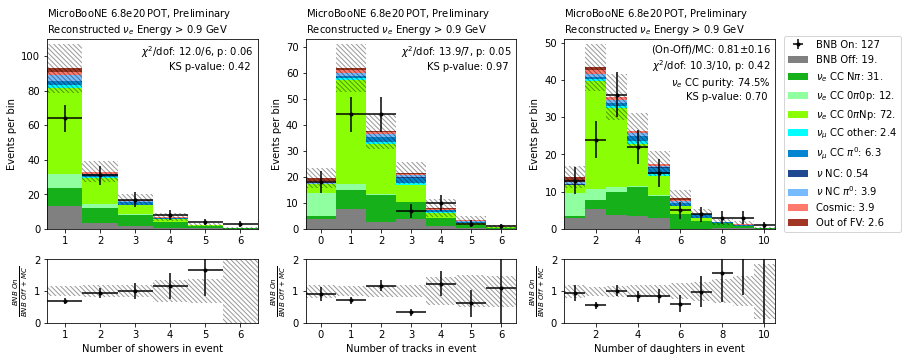

In [29]:
# number of objects after selection

fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "n_showers",
    r"Number of showers in event",
    N_bins=6,
    x_min=0.5,
    x_max=6.5,
    legend=False,
    query="e_candidate>0 & select",
    title_str=title_str,
    kind="cat"
)
plot_class.add_text(ax[0][0], [None,None,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "n_tracks",
    r"Number of tracks in event",
    N_bins=7,
    x_min=-0.5,
    x_max=6.5,
    legend=False,
    query="e_candidate>0 & select",
    title_str=title_str,
    kind="cat"  
)
plot_class.add_text(ax[0][1], [None,None,ks_p,cnp], text_loc)


ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "n_tracks+n_showers",
    r"Number of daughters in event",
    N_bins=10,
    x_min=0.5,
    x_max=10.5,
    legend=True,
    query="e_candidate>0 & select",
    title_str=title_str,
    kind="cat"  
)
plot_class.add_text(ax[0][2], [ratio,purity,ks_p,cnp], text_loc)

[x.set_ylim(0.0, 2) for x in ax[1]]

fig.savefig(output_dir + "val_event_daughters_sel.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC N$\pi$: 31. 	#entries 6080
MC category: $\nu_e$ CC 0$\pi$0p: 12. 	#entries 1939
MC category: $\nu_e$ CC 0$\pi$Np: 72. 	#entries 11807
MC category: $\nu_{\mu}$ CC other: 2.4 	#entries 30
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 6.3 	#entries 102
MC category: $\nu$ NC: 0.54 	#entries 20
MC category: $\nu$ NC $\pi^{0}$: 3.9 	#entries 38
MC category: Cosmic: 3.9 	#entries 112
MC category: Out of FV: 2.6 	#entries 77
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$\pi$: 31. 	#entries 6080
MC category: $\nu_e$ CC 0$\pi$0p: 12. 	#entries 1939
MC category: $\nu_e$ CC 0$\pi$Np: 72. 	#entries 11807
MC category: $\nu_{\mu}$ CC other: 2.4 	#entries 30
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 6.3 	#entries 102
MC category: $\nu$ NC: 0.54 	#entries 20
MC category: $\nu$ NC $\pi^{0}$: 3.9 	#entries 38
MC category: Cosmic: 3.9 	#entries 112
MC category: Out of FV: 2.6 	#entries 77
Obtained ratio and purity from dict
Detvar found
MC category: $\nu_e$ CC N$

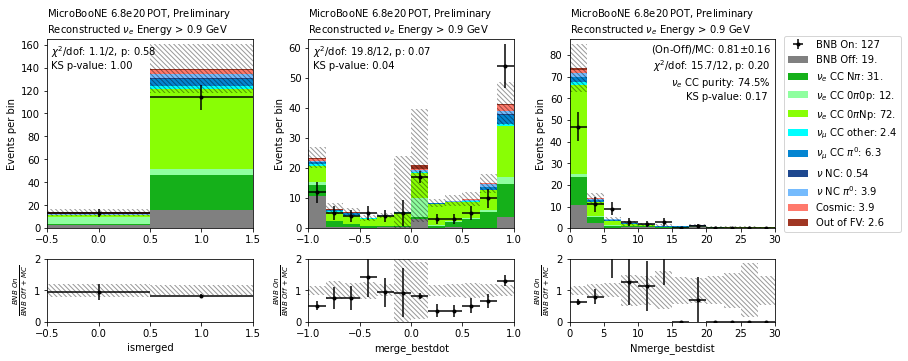

In [30]:
# number of objects after preselection
#"merge_bestdot",
#"merge_bestdist",
#"ismerged",

fig, ax = get_fig(3,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "ismerged",
    r"ismerged",
    N_bins=2,
    x_min=-0.5,
    x_max=1.5,
    legend=False,
    query="e_candidate>0 & select",
    title_str=title_str,
    kind="cat"
)
plot_class.add_text(ax[0][0], [None,None,ks_p,cnp], text_loc)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "merge_bestdot",
    r"merge_bestdot",
    N_bins=12,
    x_min=-1,
    x_max=1,
    legend=False,
    query="e_candidate>0 & select",
    title_str=title_str,
    kind="cat"  
)
plot_class.add_text(ax[0][1], [None,None,ks_p,cnp], text_loc)


ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[2],
    "merge_bestdist",
    r"Nmerge_bestdist",
    N_bins=12,
    x_min=0,
    x_max=30,
    legend=True,
    query="e_candidate>0 & select",
    title_str=title_str,
    kind="cat"  
)
plot_class.add_text(ax[0][2], [ratio,purity,ks_p,cnp], text_loc)

[x.set_ylim(0.0, 2) for x in ax[1]]

fig.savefig(output_dir + "val_merge_sel.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC N$\pi$: 31. 	#entries 6080
MC category: $\nu_e$ CC 0$\pi$0p: 12. 	#entries 1939
MC category: $\nu_e$ CC 0$\pi$Np: 72. 	#entries 11807
MC category: $\nu_{\mu}$ CC other: 2.4 	#entries 30
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 6.3 	#entries 102
MC category: $\nu$ NC: 0.54 	#entries 20
MC category: $\nu$ NC $\pi^{0}$: 3.9 	#entries 38
MC category: Cosmic: 3.9 	#entries 112
MC category: Out of FV: 2.6 	#entries 77
Obtained ratio and purity from dict
Detvar found


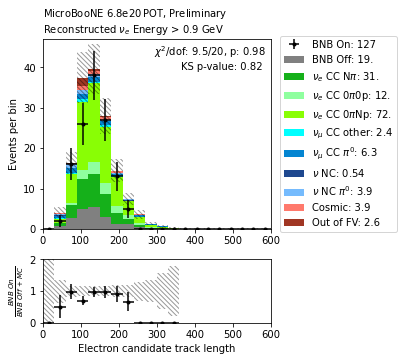

In [31]:
fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax,
    "trk_len_v",
    r"Electron candidate track length",
    N_bins=20,
    x_min=0,
    x_max=600,
    legend=True,
    query="e_candidate>0 & select",
    title_str=title_str,
    kind="cat"
)
plot_class.add_text(ax[0], [None,None,ks_p,cnp], text_loc)


fig.savefig(output_dir + "val_e_cand_trk_len.pdf", bbox_inches="tight")

In [12]:
plotter.UpdateDetvarDict(detvar_file)